## 'jeju_financial_life' 데이터
#### job_points 컬럼 추가 : 직업군별 가중치(연봉 기준) 반영
> med_income(0.6), avg_spend(0.5), avg_debt_credit(0.5), vehicle_own_rat(0.4) 과 양의 상관관계
- 직업군별 점수 가중치 환산 로직은 '사업체 규모별 평균 임금' excel 파일 참조
- 대기업(100), 중소기업(68), 공기업(92), 전문직(100), 자영업(60), 무직(0), 기타(50)

#### 신용등급(2~7등급) : 점수로 변경
  > age(0.3), sex(0.2) 외에 -0.1~0.1로 다른 변수와 연관성 거의 없음

In [1]:
data = pd.read_csv("../../01_jeju/codes/datas/jeju_financial_life_data.csv")

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data.head()

zip_cd  year_month      x_axis     y_axis  sex  age  job_majorc  \
0   63299      201902  126.565889  33.513210    1   54         0.0   
1   63560      201902  126.497121  33.247225    1   59         0.0   
2   63560      201902  126.497121  33.247225    2   49         0.0   
3   63560      201902  126.497121  33.247225    1   54         0.0   
4   63560      201902  126.497121  33.247225    1   49         0.0   

   job_smallc  job_public  job_profession  job_self  job_none  job_other  \
0    0.166667    0.000000        0.000000  0.166667  0.500000   0.166667   
1    0.125000    0.000000        0.000000  0.375000  0.500000   0.000000   
2    0.250000    0.000000        0.000000  0.125000  0.625000   0.000000   
3    0.181818    0.090909        0.090909  0.363636  0.272727   0.000000   
4    0.250000    0.000000        0.000000  0.250000  0.500000   0.000000   

   avg_income  med_income  avg_spend  avg_foreign_spend   avg_debt  \
0    37188000    33000000    2611619                  0   24285196   
1    35378000    32000000    1987726                  0  108571077   
2    32119000    34000000    3529667             172405   26424335   
3    64746000    68200000    4868477              12046  647716901   
4    29578000    29700000    5209689                  0  248232725   

   avg_debt_credit  avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  \
0         11419148         8863595           55550000                 0   
1         25896955        13317443                  0         200000000   
2         12015311        12015311           40833359                 0   
3         39952556        21558153           36697792                 0   
4         35712501         5568751                  0                 0   

   avg_debt_collateral  avg_credit_rat  medium_resid_rat  large_resid_rat  \
0             55550000               5         -999999.0        -999999.0   
1             74421721               4         -999999.0        -999999.0   
2             40833359               2         -999999.0        -999999.0   
3            706300496               4         -999999.0        -999999.0   
4            626810674               5         -999999.0        -999999.0   

   vehicle_own_rat  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.166667  
4         0.000000

In [4]:
job_df = data[['job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other']]
job_df

job_majorc  job_smallc  job_public  job_profession  job_self  job_none  \
0        0.000000    0.166667    0.000000        0.000000  0.166667  0.500000   
1        0.000000    0.125000    0.000000        0.000000  0.375000  0.500000   
2        0.000000    0.250000    0.000000        0.000000  0.125000  0.625000   
3        0.000000    0.181818    0.090909        0.090909  0.363636  0.272727   
4        0.000000    0.250000    0.000000        0.000000  0.250000  0.500000   
...           ...         ...         ...             ...       ...       ...   
10417    0.017544    0.385965    0.035088        0.017544  0.122807  0.385965   
10418    0.028571    0.085714    0.085714        0.000000  0.371429  0.285714   
10419    0.029412    0.264706    0.000000        0.029412  0.088235  0.470588   
10420    0.052632    0.078947    0.052632        0.000000  0.394737  0.368421   
10421    0.081081    0.324324    0.054054        0.000000  0.108108  0.351351   

       job_other  
0       0.166667  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
10417   0.035088  
10418   0.142857  
10419   0.117647  
10420   0.052632  
10421   0.081081  

[10422 rows x 7 columns]

In [5]:
job_df

job_majorc  job_smallc  job_public  job_profession  job_self  job_none  \
0        0.000000    0.166667    0.000000        0.000000  0.166667  0.500000   
1        0.000000    0.125000    0.000000        0.000000  0.375000  0.500000   
2        0.000000    0.250000    0.000000        0.000000  0.125000  0.625000   
3        0.000000    0.181818    0.090909        0.090909  0.363636  0.272727   
4        0.000000    0.250000    0.000000        0.000000  0.250000  0.500000   
...           ...         ...         ...             ...       ...       ...   
10417    0.017544    0.385965    0.035088        0.017544  0.122807  0.385965   
10418    0.028571    0.085714    0.085714        0.000000  0.371429  0.285714   
10419    0.029412    0.264706    0.000000        0.029412  0.088235  0.470588   
10420    0.052632    0.078947    0.052632        0.000000  0.394737  0.368421   
10421    0.081081    0.324324    0.054054        0.000000  0.108108  0.351351   

       job_other  
0       0.166667  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
10417   0.035088  
10418   0.142857  
10419   0.117647  
10420   0.052632  
10421   0.081081  

[10422 rows x 7 columns]

<AxesSubplot:>

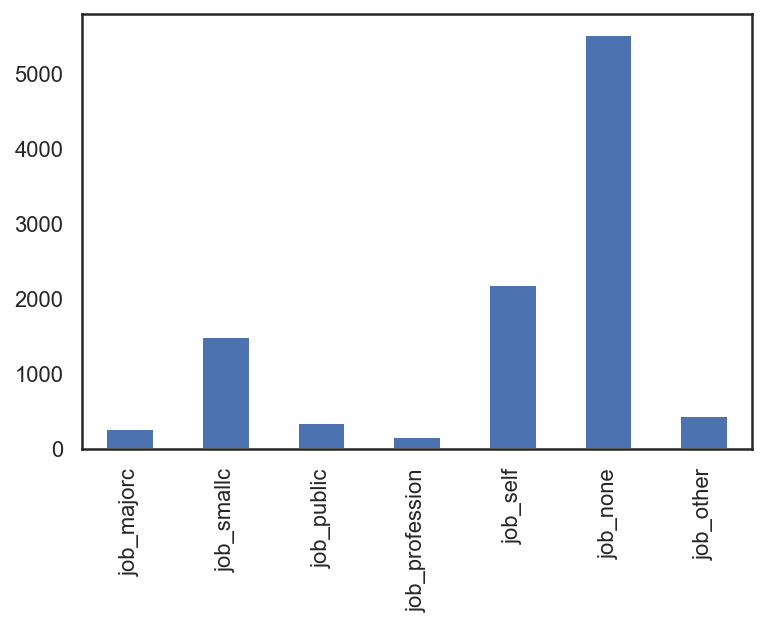

In [6]:
job_df.loc[0:].sum().plot.bar()

In [7]:
totalsum = job_df.iloc[0:].sum().sum()

In [8]:
a = [np.round(each/totalsum*100,2) for each in job_df.iloc[0:].sum()]
a

[2.57, 14.36, 3.28, 1.5, 21.03, 52.98, 4.28]

In [9]:
sum(a[0:])

100.0

In [10]:
# 직업군별 점수 가중치는 '사업체 규모별 평균 임금' excel 파일 참조
# 대기업, 중소기업, 공기업, 전문직, 자영업, 무직, 기타 순
job_points = [100, 68, 92, 100, 60, 0, 50]
# job_points = [100, 60, 90, 120, 50, 0, 50]

In [11]:
job_df.loc[1][0]

0.0

In [12]:
len(job_df)

10422

In [13]:
# 가중치 점수 변환
sum_list = []
for a in range(0, len(job_df)):
    row_sum = 0
    for i in range(0,7):
        row_sum += job_df.loc[a][i]*job_points[i]
    sum_list.append(round(row_sum,2))
sum_list

[29.67,
 31.0,
 24.5,
 51.64,
 32.0,
 28.5,
 21.64,
 41.6,
 53.27,
 52.25,
 44.91,
 29.14,
 33.0,
 17.0,
 34.0,
 42.36,
 23.5,
 37.0,
 69.4,
 20.0,
 26.77,
 32.0,
 43.56,
 48.0,
 50.17,
 27.25,
 7.56,
 34.75,
 25.6,
 42.25,
 0.0,
 68.86,
 37.0,
 49.8,
 33.67,
 51.0,
 33.75,
 55.75,
 13.64,
 44.25,
 54.67,
 49.71,
 56.0,
 44.92,
 19.43,
 45.6,
 6.18,
 60.25,
 21.71,
 30.67,
 43.64,
 3.85,
 51.84,
 35.56,
 47.29,
 6.0,
 29.42,
 45.9,
 32.6,
 37.83,
 43.09,
 35.75,
 23.11,
 24.24,
 38.2,
 19.37,
 28.62,
 33.8,
 36.77,
 45.96,
 5.57,
 18.46,
 20.0,
 13.42,
 33.54,
 41.68,
 16.63,
 46.18,
 41.05,
 35.43,
 11.67,
 26.52,
 33.45,
 48.1,
 41.57,
 41.19,
 44.0,
 49.87,
 44.59,
 43.87,
 24.74,
 34.3,
 41.0,
 34.78,
 55.48,
 31.3,
 17.14,
 37.23,
 3.05,
 29.4,
 0.0,
 35.73,
 47.45,
 41.02,
 12.33,
 8.5,
 32.77,
 29.03,
 46.0,
 37.97,
 10.57,
 53.15,
 40.42,
 41.24,
 15.11,
 25.9,
 24.08,
 49.93,
 18.84,
 30.86,
 38.2,
 5.0,
 55.21,
 32.31,
 41.82,
 20.67,
 29.0,
 31.33,
 51.86,
 46.5,
 45.11,
 24

In [14]:
# job_points 컬럼 추가
job_df['job_points'] = sum_list
job_df.head()

job_majorc  job_smallc  job_public  job_profession  job_self  job_none  \
0         0.0    0.166667    0.000000        0.000000  0.166667  0.500000   
1         0.0    0.125000    0.000000        0.000000  0.375000  0.500000   
2         0.0    0.250000    0.000000        0.000000  0.125000  0.625000   
3         0.0    0.181818    0.090909        0.090909  0.363636  0.272727   
4         0.0    0.250000    0.000000        0.000000  0.250000  0.500000   

   job_other  job_points  
0   0.166667       29.67  
1   0.000000       31.00  
2   0.000000       24.50  
3   0.000000       51.64  
4   0.000000       32.00

In [15]:
job_df['job_points'].max(), job_df['job_points'].min()

(73.08, 0.0)

In [16]:
job_df['job_points'].describe()

count    10422.000000
mean        31.607145
std         14.093122
min          0.000000
25%         21.805000
50%         33.155000
75%         42.170000
max         73.080000
Name: job_points, dtype: float64

In [17]:
data['job_points'] = sum_list
data_sample_1 = data.drop(['year_month','job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other'], axis=1)
data_sample_1.head()

zip_cd      x_axis     y_axis  sex  age  avg_income  med_income  avg_spend  \
0   63299  126.565889  33.513210    1   54    37188000    33000000    2611619   
1   63560  126.497121  33.247225    1   59    35378000    32000000    1987726   
2   63560  126.497121  33.247225    2   49    32119000    34000000    3529667   
3   63560  126.497121  33.247225    1   54    64746000    68200000    4868477   
4   63560  126.497121  33.247225    1   49    29578000    29700000    5209689   

   avg_foreign_spend   avg_debt  avg_debt_credit  avg_debt_noneb  \
0                  0   24285196         11419148         8863595   
1                  0  108571077         25896955        13317443   
2             172405   26424335         12015311        12015311   
3              12046  647716901         39952556        21558153   
4                  0  248232725         35712501         5568751   

   avg_debt_mortgage  avg_debt_deposit  avg_debt_collateral  avg_credit_rat  \
0           55550000                 0             55550000               5   
1                  0         200000000             74421721               4   
2           40833359                 0             40833359               2   
3           36697792                 0            706300496               4   
4                  0                 0            626810674               5   

   medium_resid_rat  large_resid_rat  vehicle_own_rat  job_points  
0         -999999.0        -999999.0         0.000000       29.67  
1         -999999.0        -999999.0         0.000000       31.00  
2         -999999.0        -999999.0         0.000000       24.50  
3         -999999.0        -999999.0         0.166667       51.64  
4         -999999.0        -999999.0         0.000000       32.00

In [18]:
# 신용 등급 > 점수화
# 나이스 신용정보 기준 해당 등급 최고점 반영
# https://namu.wiki/w/%EC%8B%A0%EC%9A%A9%EC%A0%90%EC%88%98%EC%A0%9C?from=%EC%8B%A0%EC%9A%A9%EB%93%B1%EA%B8%89
credit_points = {'avg_credit_rat':[2,3,4,5,6,7],
                'credit_points':[899,869,839,804,749,664]}
credit_table = pd.DataFrame(credit_points)
credit_table

avg_credit_rat  credit_points
0               2            899
1               3            869
2               4            839
3               5            804
4               6            749
5               7            664

In [19]:
# 데이터 상 최저 2, 최고 7 등급
data['avg_credit_rat'].max(), data['avg_credit_rat'].min()

(7, 2)

In [20]:
# 신용 등급 > 신용 점수 치환
data_sample_1['avg_credit_rat'].replace(credit_points['avg_credit_rat'],credit_points['credit_points'],inplace=True)
data_sample_1.head()

zip_cd      x_axis     y_axis  sex  age  avg_income  med_income  avg_spend  \
0   63299  126.565889  33.513210    1   54    37188000    33000000    2611619   
1   63560  126.497121  33.247225    1   59    35378000    32000000    1987726   
2   63560  126.497121  33.247225    2   49    32119000    34000000    3529667   
3   63560  126.497121  33.247225    1   54    64746000    68200000    4868477   
4   63560  126.497121  33.247225    1   49    29578000    29700000    5209689   

   avg_foreign_spend   avg_debt  avg_debt_credit  avg_debt_noneb  \
0                  0   24285196         11419148         8863595   
1                  0  108571077         25896955        13317443   
2             172405   26424335         12015311        12015311   
3              12046  647716901         39952556        21558153   
4                  0  248232725         35712501         5568751   

   avg_debt_mortgage  avg_debt_deposit  avg_debt_collateral  avg_credit_rat  \
0           55550000                 0             55550000             804   
1                  0         200000000             74421721             839   
2           40833359                 0             40833359             899   
3           36697792                 0            706300496             839   
4                  0                 0            626810674             804   

   medium_resid_rat  large_resid_rat  vehicle_own_rat  job_points  
0         -999999.0        -999999.0         0.000000       29.67  
1         -999999.0        -999999.0         0.000000       31.00  
2         -999999.0        -999999.0         0.000000       24.50  
3         -999999.0        -999999.0         0.166667       51.64  
4         -999999.0        -999999.0         0.000000       32.00

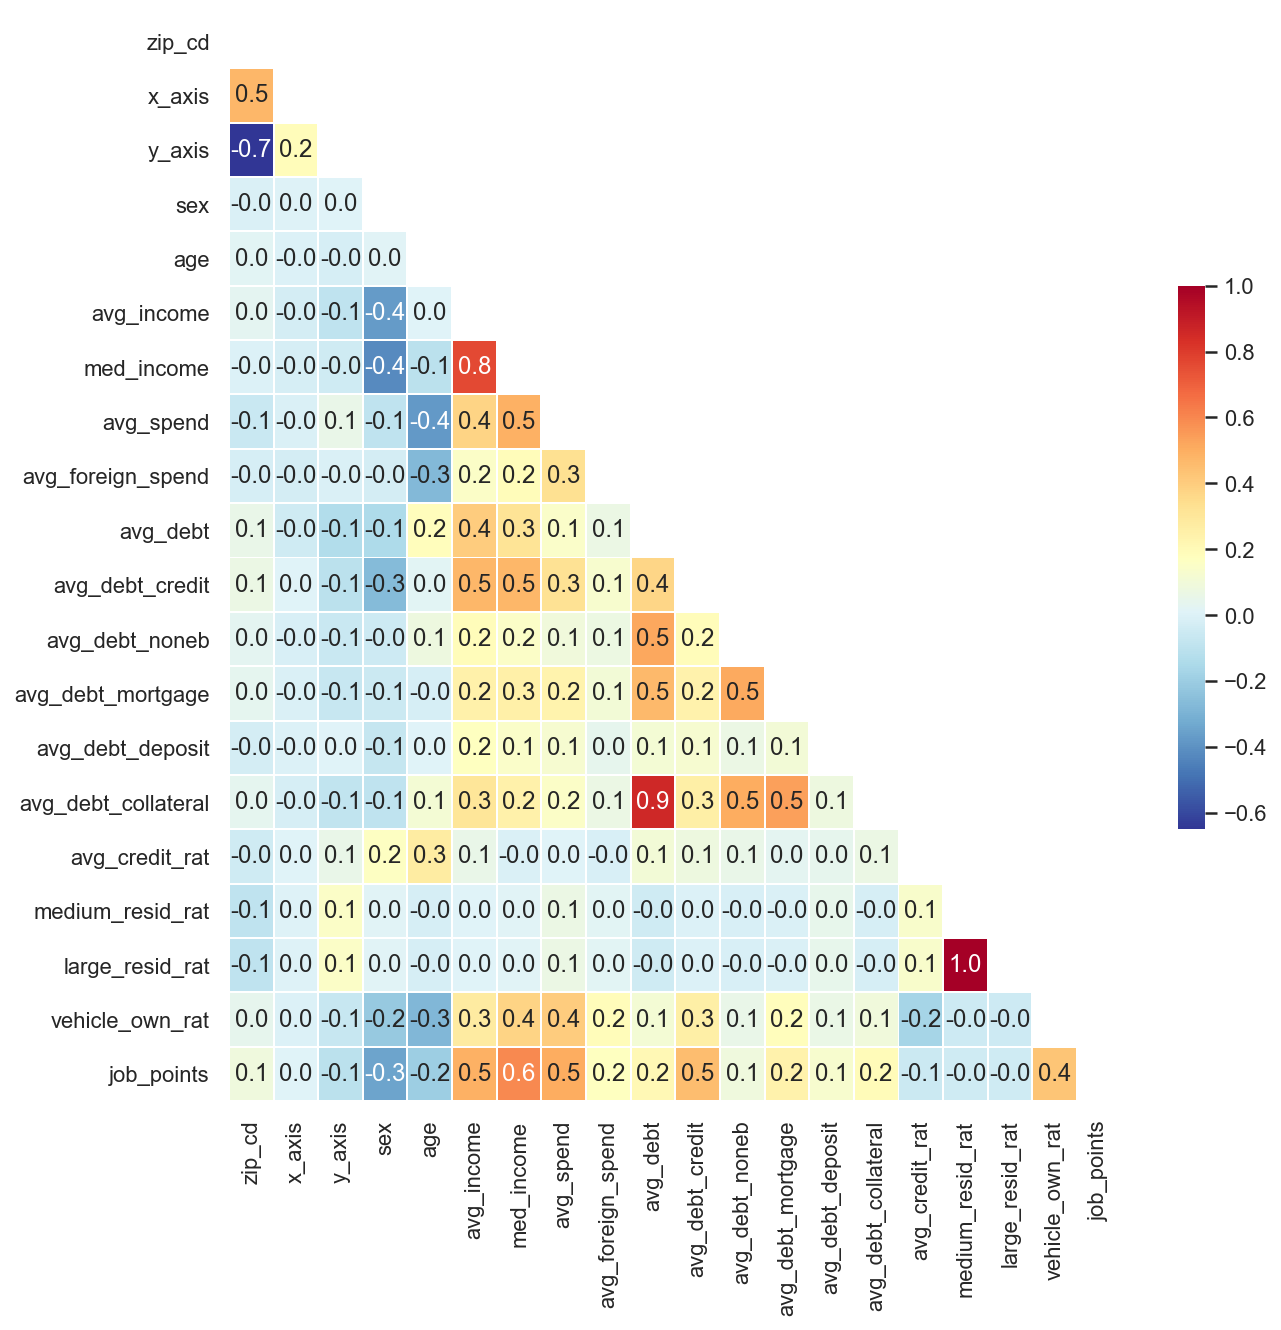

In [21]:
plt.figure(figsize=(10,10))
# 히트맵 반만 보여주기
mask = np.zeros_like(data_sample_1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

a = sns.heatmap(data_sample_1.corr(), annot = True, fmt ='.1f', linewidths=0.5, cmap='RdYlBu_r',mask=mask, cbar_kws={'shrink':.5});

In [22]:
# 성별에 따른 비교
# 남성 우위 > 직업점수, 소득, 소비, 자가차량보유 
data_sample_1.groupby('sex').mean()

zip_cd      x_axis     y_axis        age    avg_income  \
sex                                                                 
1    63287.171899  126.514629  33.432970  53.474281  3.961296e+07   
2    63284.166537  126.515503  33.434901  54.065251  2.929469e+07   

       med_income     avg_spend  avg_foreign_spend      avg_debt  \
sex                                                                
1    3.428045e+07  4.527716e+06       71848.932867  1.027996e+08   
2    2.718182e+07  3.958068e+06       63587.847877  7.372754e+07   

     avg_debt_credit  avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  \
sex                                                                         
1       2.401184e+07    4.687174e+07       1.035237e+08      1.088309e+07   
2       1.663476e+07    3.869958e+07       8.995947e+07      6.728525e+06   

     avg_debt_collateral  avg_credit_rat  medium_resid_rat  large_resid_rat  \
sex                                                                           
1           1.506818e+08      841.795953    -761723.775461   -761723.881446   
2           1.193527e+08      849.273666    -748927.835776   -748927.943941   

     vehicle_own_rat  job_points  
sex                               
1           0.048746   36.387023  
2           0.028455   26.683888

In [23]:
data_sample_1[data_sample_1['sex']==1].groupby('age').mean()

zip_cd      x_axis     y_axis  sex    avg_income    med_income  \
age                                                                         
24   63279.509390  126.511819  33.435133  1.0  2.352596e+07  2.329556e+07   
29   63281.211679  126.515340  33.435832  1.0  2.882525e+07  2.817438e+07   
34   63284.051597  126.518534  33.437313  1.0  3.561438e+07  3.407339e+07   
39   63285.435897  126.515053  33.434797  1.0  4.159127e+07  3.804981e+07   
44   63284.494279  126.512939  33.433988  1.0  4.555478e+07  4.073604e+07   
49   63288.419283  126.513341  33.432200  1.0  4.878032e+07  4.247334e+07   
54   63285.815145  126.513402  33.432928  1.0  5.012012e+07  4.256314e+07   
59   63287.609375  126.513918  33.432579  1.0  4.926454e+07  4.027743e+07   
64   63287.658314  126.514333  33.432504  1.0  4.335077e+07  3.381975e+07   
69   63286.813602  126.513844  33.432710  1.0  3.833171e+07  3.020801e+07   
74   63291.594241  126.516549  33.431719  1.0  3.743711e+07  2.971819e+07   
79   63296.223242  126.515185  33.429153  1.0  3.474849e+07  2.885607e+07   
99   63301.086207  126.517535  33.424273  1.0  3.143474e+07  2.776755e+07   

        avg_spend  avg_foreign_spend      avg_debt  avg_debt_credit  \
age                                                                   
24   2.017651e+06       57639.913146  1.833624e+07     7.644747e+06   
29   3.994841e+06      122349.204380  4.145081e+07     1.522019e+07   
34   5.587395e+06      125656.594595  6.251672e+07     2.303448e+07   
39   6.494252e+06      129886.790210  9.060961e+07     2.755608e+07   
44   7.451906e+06      124858.789474  1.204162e+08     3.142890e+07   
49   6.852268e+06       85357.526906  1.291715e+08     3.018281e+07   
54   6.020081e+06       80409.708241  1.424669e+08     3.012146e+07   
59   5.141883e+06       60362.412946  1.375224e+08     2.860520e+07   
64   4.377352e+06       53012.822323  1.397568e+08     2.522425e+07   
69   3.390616e+06       25967.785894  1.268788e+08     2.388768e+07   
74   2.517459e+06       17252.942408  1.160567e+08     2.483897e+07   
79   1.837417e+06        3519.733945  9.994855e+07     2.300738e+07   
99   7.987854e+05        3899.582759  1.030694e+08     1.779825e+07   

     avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  avg_debt_collateral  \
age                                                                             
24     1.301080e+07       1.688226e+07      1.427974e+06         2.991027e+07   
29     2.361851e+07       8.248088e+07      4.203111e+06         8.041066e+07   
34     3.021664e+07       1.064950e+08      6.941410e+06         1.082407e+08   
39     4.073734e+07       1.286799e+08      1.243952e+07         1.451894e+08   
44     5.881618e+07       1.412071e+08      1.350970e+07         1.805943e+08   
49     5.729620e+07       1.357204e+08      1.874386e+07         1.852898e+08   
54     6.111891e+07       1.407070e+08      1.639305e+07         2.046198e+08   
59     6.009121e+07       1.294961e+08      1.660621e+07         1.917016e+08   
64     6.069567e+07       1.285810e+08      1.622336e+07         1.960674e+08   
69     5.035224e+07       9.930529e+07      1.219017e+07         1.805952e+08   
74     6.284991e+07       9.756301e+07      7.021114e+06         1.618437e+08   
79     4.553423e+07       5.962973e+07      6.810951e+06         1.370155e+08   
99     4.027531e+07       4.043012e+07      3.854930e+06         1.412443e+08   

     avg_credit_rat  medium_resid_rat  large_resid_rat  vehicle_own_rat  \
age                                                                       
24       832.661972    -758215.078343   -758215.187627         0.008753   
29       825.447689    -742091.575440   -742091.697172         0.060421   
34       833.520885    -744470.876111   -744470.983190         0.079165   
39       835.526807    -757574.879464   -757574.985649         0.085797   
44       832.272311    -757436.187610   -757436.299306         0.083530   
49       830.659193    -760088.804716   -760088.

In [24]:
data_sample_1[data_sample_1['sex']==2].groupby('age').mean()

zip_cd      x_axis     y_axis  sex    avg_income    med_income  \
age                                                                         
24   63282.748148  126.516981  33.436610  2.0  2.153386e+07  2.134723e+07   
29   63280.434211  126.518532  33.438089  2.0  2.566098e+07  2.513557e+07   
34   63276.838875  126.518167  33.438180  2.0  3.024617e+07  2.948772e+07   
39   63281.004819  126.515029  33.436131  2.0  3.368879e+07  3.168854e+07   
44   63280.175904  126.514170  33.436404  2.0  3.407092e+07  3.151441e+07   
49   63283.623557  126.513460  33.434484  2.0  3.502310e+07  3.188372e+07   
54   63284.679724  126.516022  33.435354  2.0  3.433855e+07  3.027168e+07   
59   63285.527397  126.515003  33.433838  2.0  3.321709e+07  2.934355e+07   
64   63287.044706  126.515709  33.433190  2.0  2.933354e+07  2.619747e+07   
69   63284.600000  126.513987  33.434087  2.0  2.721012e+07  2.452717e+07   
74   63290.777465  126.516315  33.432937  2.0  2.526165e+07  2.328639e+07   
79   63289.495441  126.513215  33.431458  2.0  2.489959e+07  2.366722e+07   
99   63289.492401  126.514894  33.431859  2.0  2.206840e+07  2.179114e+07   

        avg_spend  avg_foreign_spend      avg_debt  avg_debt_credit  \
age                                                                   
24   2.433097e+06       82178.898765  1.386382e+07     7.643435e+06   
29   4.445397e+06      118097.344737  2.778172e+07     1.374031e+07   
34   5.628561e+06      120012.168798  4.206772e+07     1.772488e+07   
39   6.378658e+06      103826.549398  6.284978e+07     2.045168e+07   
44   6.614832e+06      101691.007229  7.974036e+07     2.134583e+07   
49   6.255930e+06       95794.875289  9.750531e+07     2.132186e+07   
54   5.560701e+06       65388.320276  1.026774e+08     2.091248e+07   
59   4.317960e+06       45152.317352  1.086561e+08     2.044736e+07   
64   3.170043e+06       34253.602353  1.063803e+08     1.777390e+07   
69   2.262093e+06       15485.041558  9.813678e+07     1.562799e+07   
74   1.313709e+06        7892.208451  8.117580e+07     1.469479e+07   
79   7.886915e+05        7106.534954  7.099564e+07     1.290384e+07   
99   2.904251e+05        2408.173252  5.221724e+07     7.636823e+06   

     avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  avg_debt_collateral  \
age                                                                             
24     1.000361e+07       1.255039e+07      1.050815e+06         1.963917e+07   
29     1.863785e+07       5.671380e+07      3.712807e+06         5.321950e+07   
34     2.291726e+07       8.254288e+07      4.860919e+06         7.590749e+07   
39     3.258873e+07       1.179369e+08      8.398157e+06         1.255004e+08   
44     4.322821e+07       1.262949e+08      8.075449e+06         1.432893e+08   
49     5.078016e+07       1.321446e+08      1.132366e+07         1.672379e+08   
54     5.480180e+07       1.263568e+08      1.060678e+07         1.684819e+08   
59     5.704825e+07       1.241976e+08      9.238952e+06         1.712676e+08   
64     6.077408e+07       1.226792e+08      8.960274e+06         1.763844e+08   
69     4.880374e+07       8.734576e+07      6.661135e+06         1.397296e+08   
74     3.452280e+07       5.985773e+07      6.054133e+06         1.218749e+08   
79     4.247186e+07       5.401384e+07      3.204228e+06         9.568539e+07   
99     1.677484e+07       3.144223e+07      2.557509e+06         5.865045e+07   

     avg_credit_rat  medium_resid_rat  large_resid_rat  vehicle_own_rat  \
age                                                                       
24       834.740741    -740739.861818   -740739.982138         0.006073   
29       843.447368    -723683.345969   -723683.468084         0.029189   
34       852.836317    -726341.843581   -726341.967882         0.043363   
39       851.204819    -744577.435995   -744577.550686         0.050575   
44       848.084337    -746987.077316   -746987.189875         0.046750   
49       849.127021    -755195.422308   -755195.

In [25]:
data_sample_4 = data[['age','sex','job_points','job_majorc','job_smallc','job_public','job_profession','job_self','job_none','job_other']].copy()

In [27]:
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [28]:
fig_his = px.histogram(data_sample_4, x='age', y='job_points', color='sex',marginal='box',
                       hover_data=data_sample_4.columns, nbins=38)
fig_his.show()

In [29]:
data_sample_2 = data_sample_1[['x_axis','y_axis','job_points']].copy()

In [30]:
data_sample_2_pt = pd.pivot_table(data_sample_2,
                                 index = ['x_axis', 'y_axis'],
                                 values = ['job_points'],
                                 aggfunc={'job_points':'median'},
                                  margins = True
                                 )
data_sample_2_pt

job_points
x_axis             y_axis                        
126.17209734       33.32774255633          30.290
126.18121201211    33.302236442506         27.400
126.18491132558998 33.279152058528         32.400
126.18701809758    33.346003094982         34.090
126.20242889495    33.359787781359         35.565
126.2074398173     33.270237172519         37.030
126.20953315682    33.25659275186          33.330
126.22540856108    33.384934517081         38.000
126.22637271287    33.246212954945         30.830
126.22897475444    33.299455576309995      32.000
126.22898741576    33.334881881987         36.260
126.24346006715    33.361427990146         39.500
126.24446486328002 33.395805710893         32.225
126.2461303837     33.226275420798004      34.805
126.24695754786    33.380553727991         29.850
126.24804051959    33.281152683505         27.500
126.25031154033998 33.313754706223         30.000
126.25071803088998 33.224695996525         34.630
126.25278552997    33.351445802076995      37.605
126.25400635127    33.403187682058004      31.450
126.25420044121    33.224751507174         34.980
126.25715133913    33.230166194686         37.655
126.2574029883     33.265078647075         33.755
126.2574848041     33.218293595309         33.415
126.25911471573    33.223645316448         31.335
126.2612655891     33.33062546528          30.060
126.26253459787    33.412208789764         33.945
126.26363293801    33.419123434658         30.800
126.26484781337    33.406039355365         37.055
126.26591211427    33.418822089197         30.215
126.26659358551    33.117336414493         53.140
126.26666605338    33.413448870986         28.415
126.26711768585    33.42785174375          33.725
126.26977816482    33.413072430054         38.710
126.27167370152    33.169194671212004      34.290
126.27212229675    33.361163731065         40.000
126.27267467445    33.385653270796         31.380
126.27378496043998 33.223020216889         33.825
126.27505981179    33.253716486105         39.450
126.27521955161998 33.421629544154         32.430
126.27879890058    33.410260559942         37.500
126.27923930259    33.271884510881         43.000
126.28089105578998 33.287868057885         31.310
126.28157622867    33.246656015017         35.110
126.28342963048    33.256071086644         42.545
126.28705266928002 33.279439734641         37.065
126.28924341175    33.440403610351         35.670
126.29302881808998 33.400247585324         45.670
126.29490650217    33.421702737771         33.030
126.29529248259    33.359172982591         30.000
126.29561469352    33.962512428875         22.000
126.30201940772    33.233326989495         35.055
126.30294140298    33.290352227606         34.565
126.30673102995    33.445843183746         28.355
126.30761952254    33.259248383934995      28.390
126.31500885608    33.417514390998         37.885
126.31971059557    33.464330460329         27.340
126.32392868101002 33.293718890032004      32.380
126.32552556052    33.947015038961         29.165
126.32689615482    33.457365157359995      27.560
126.32969369356    33.253220896444         37.870
126.33180965706998 33.436303972453         37.025
126.3343026386     33.245981737474         28.615
126.33666977745    33.465312574113         33.450
126.33779750222    33.308014028481004      27.330
126.33786818442    33.407888748995         35.640
126.34791890353    33.468984357337         30.975
126.34809671792    33.348363160290006      32.860
126.34983751472    33.452050918738         32.775
126.35383982511    33.258113927702         30.065
126.3615754209     33.275542232836         34.225
126.36394480625    33.319197469531005      44.000
126.36622414602    33.237051889552         31.525
126.36717269371    33.474243240319         31.895
126.36775692266    33.464034941153         36.400
126.36860431187    33.265669005023         36.250
126.37763273481    33.477484275974         33.005
126.38162540105    33.428979373431         34.880
126.38255864302    33.241257000114004  

In [31]:
data_sample_2.isnull().sum()

x_axis        0
y_axis        0
job_points    0
dtype: int64

In [32]:
data_sample_2[data_sample_2['job_points']>65].sort_values(by='job_points',ascending=False)

x_axis     y_axis  job_points
7956  126.552444  33.499993       73.08
9561  126.549580  33.251119       69.50
18    126.790590  33.532487       69.40
6071  126.742696  33.547888       69.14
31    126.554738  33.501845       68.86
8785  126.543646  33.494397       68.74
385   126.411134  33.247538       68.67
6583  126.711632  33.330087       68.25
4768  126.530341  33.244538       68.00
1439  126.496935  33.509900       67.38
340   126.396316  33.251423       67.09
3560  126.361575  33.275542       67.00
4649  126.449873  33.477713       66.53
2143  126.683020  33.487939       66.33
4386  126.348097  33.348363       66.00
3327  126.608510  33.298610       65.50
1939  126.429644  33.494006       65.33
3429  126.516826  33.493678       65.09
9571  126.478297  33.235860       65.04

In [33]:
data.iloc[[7956]]

zip_cd  year_month      x_axis     y_axis  sex  age  job_majorc  \
7956   63263      201902  126.552444  33.499993    1   59    0.076923   

      job_smallc  job_public  job_profession  job_self  job_none  job_other  \
7956         0.0    0.384615        0.076923  0.307692  0.076923   0.076923   

      avg_income  med_income  avg_spend  avg_foreign_spend   avg_debt  \
7956    52132000    41000000    6015548              74507  111871673   

      avg_debt_credit  avg_debt_noneb  avg_debt_mortgage  avg_debt_deposit  \
7956         35390578        40275071          149153295                 0   

      avg_debt_collateral  avg_credit_rat  medium_resid_rat  large_resid_rat  \
7956            158860619               4         -999999.0        -999999.0   

      vehicle_own_rat  job_points  
7956         0.066667       73.08

In [34]:
fig = px.box(data_sample_2, y = 'job_points')
fig.show()

In [35]:
data_sample_2['job_points'].nunique()

3912

In [36]:
data_sample_2['job_points'].describe()

count    10422.000000
mean        31.607145
std         14.093122
min          0.000000
25%         21.805000
50%         33.155000
75%         42.170000
max         73.080000
Name: job_points, dtype: float64

In [37]:
scatter_fig = px.scatter(data_sample_2, x = "x_axis", y = "y_axis", size='job_points', size_max = 10)
scatter_fig.show()

In [38]:
fig2 = px.density_contour(data_sample_2, x = "x_axis", y = "y_axis")
fig2.show()

In [39]:
fig3 = px.scatter_3d(data_sample_2, x = "x_axis", y = "y_axis", z="job_points",size="job_points")
fig3.show()